In [1]:
from pdf2image import convert_from_path, convert_from_bytes
import os

In [2]:
def convert_to_png(path_list):
    images = []
    for i in path_list:
        images.append(convert_from_path(i)[0])
    for i in images:
        i.save(str(i)+'_temp'+'.png')
    

In [17]:
path = ['0H54AH30_10.pdf']
convert_to_png(path)


In [3]:
import cv2

In [4]:
image_1 = cv2.imread('sample_temp.png')

In [5]:

def display_image(img, cmap=None):
    dpi = 80
    margin = 0.05 # (5% of the width/height of the figure...)
    xpixels, ypixels = 800, 800

    # Make a figure big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    ax.imshow(img, cmap=cmap)
    plt.show()

In [7]:
from PIL import Image

In [8]:
img = Image.open('sample_temp.png')


In [9]:
width, height = img.size

In [10]:
width

1654

In [11]:
height

2339

In [12]:
im = cv2.imread('sample_temp.png')

In [13]:
import numpy as np

In [14]:
im.min()

0

In [16]:
(im >= im.min()).all() and (im <= 40).all()

False

In [17]:
a = np.where(np.logical_and(im>=im.min(), im<=30))


In [18]:
a

(array([  32,   32,   32, ..., 2315, 2315, 2315]),
 array([1425, 1425, 1425, ..., 1056, 1056, 1056]),
 array([0, 1, 2, ..., 0, 1, 2]))

In [19]:
merge_arr = np.concatenate(a)

In [20]:
first_layer = a[0]

In [21]:
second_layer = a[1]

In [22]:
third_layer = a[2]

In [23]:
# from PIL import Image
# im = Image.open('sample_temp.png')
# pixels = im.getdata()          # get the pixels as a flattened sequence
# black_thresh = 50
# nblack = 0
# for pixel in pixels:
#     for i in pixel:
#         if i < black_thresh:
#             nblack += 1

        
# n = len(pixels)

# if (nblack / float(n)) > 0.5:
#     print("mostly black")

In [24]:
im = Image.open('sample_temp.png')
pixels = im.getdata()

In [27]:
gray.size

3868706

In [28]:
gray.shape

(2339, 1654)

In [111]:
import cv2
import numpy as np

img = cv2.imread('sample_temp.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)

True

In [125]:
line_picture = cv2.imread('houghlines5.jpg')

In [144]:
img = cv2.imread('sample_temp.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bw = np.zeros(gray.shape, dtype = "uint8")

th2 = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, -2)


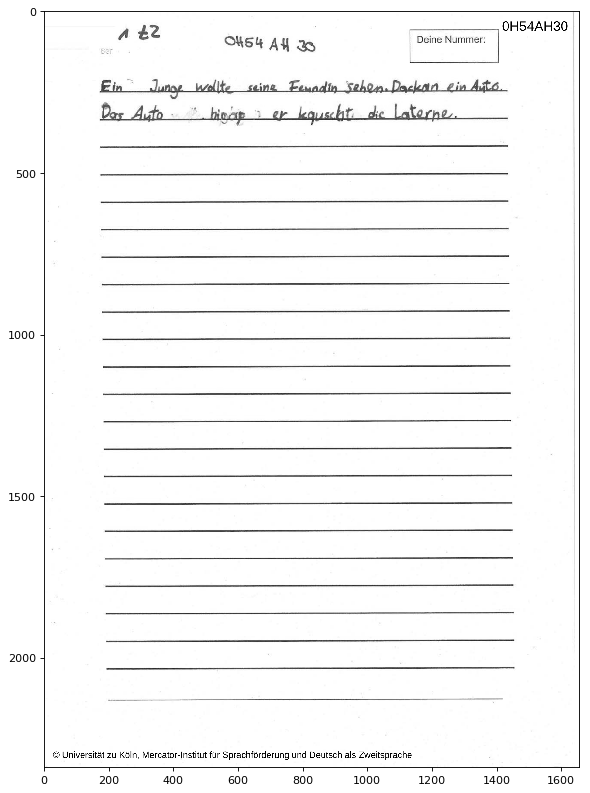

In [148]:
display_image(gray, 'gray')

In [149]:
gray.shape

(2339, 1654)

In [161]:
from skimage import morphology

In [29]:
import numpy as np

img = cv2.imread("sample_temp.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img = cv2.bitwise_not(img)
th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)
# cv2.imshow("th2", th2)
# cv2.imwrite("th2.jpg", th2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

horizontal = th2
vertical = th2
rows,cols = horizontal.shape

#inverse the image, so that lines are black for masking
horizontal_inv = cv2.bitwise_not(horizontal)
#perform bitwise_and to mask the lines with provided mask
masked_img = cv2.bitwise_and(img, img, mask=horizontal_inv)
#reverse the image back to normal
masked_img_inv = cv2.bitwise_not(masked_img)
cv2.imwrite("result2.jpg", masked_img_inv)


horizontalsize = int(cols / 30)
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,1))
horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))
cv2.imwrite("horizontal.jpg", horizontal)


#step1
edges = cv2.adaptiveThreshold(horizontal,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,-2)
cv2.imwrite("edges.jpg", edges)


#step2
kernel = np.ones((2, 2), dtype = "uint8")
dilated = cv2.dilate(edges, kernel)
cv2.imwrite("dilated.jpg", dilated)

# step3
smooth = horizontal.copy()

#step 4
smooth = cv2.blur(smooth, (4,4))
cv2.imwrite("smooth.jpg", smooth)


#step 5
(rows, cols) = np.where(img == 0)
horizontal[rows, cols] = smooth[rows, cols]

cv2.imwrite("horizontal_final.jpg", horizontal)





True

In [34]:

img = cv2.imread("sample_temp.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [35]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [223, 235, 247, ..., 255, 255, 255],
       [216, 232, 246, ..., 255, 255, 255],
       [216, 232, 246, ..., 255, 255, 255]], dtype=uint8)

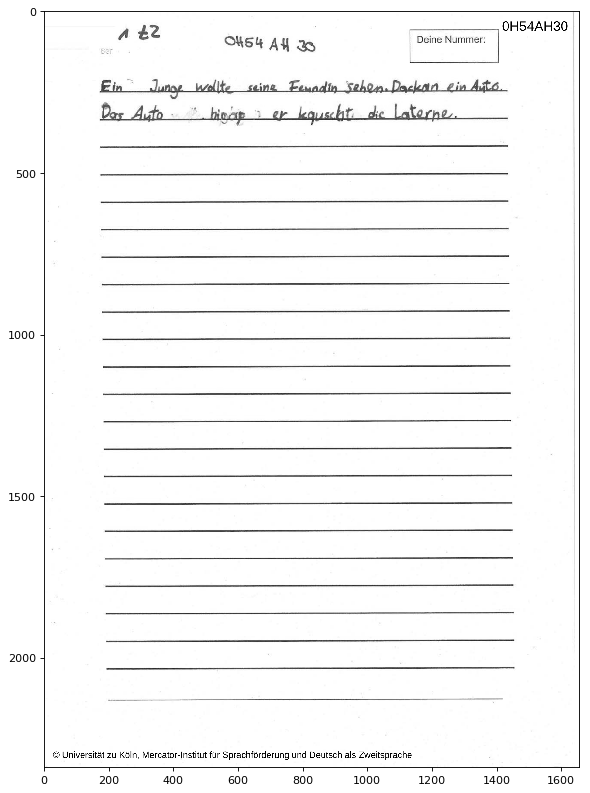

In [38]:
import matplotlib.pyplot as plt
display_image(gray, 'gray')

In [50]:
threshold= set(range(150,256))
for i, array in enumerate(horizontal):
    for j, element in enumerate(array):
        if element in threshold:
            gray[i, j] = 255
            
            
            

In [51]:
from PIL import Image
im = Image.fromarray(gray)
im.save("your_file.jpeg")

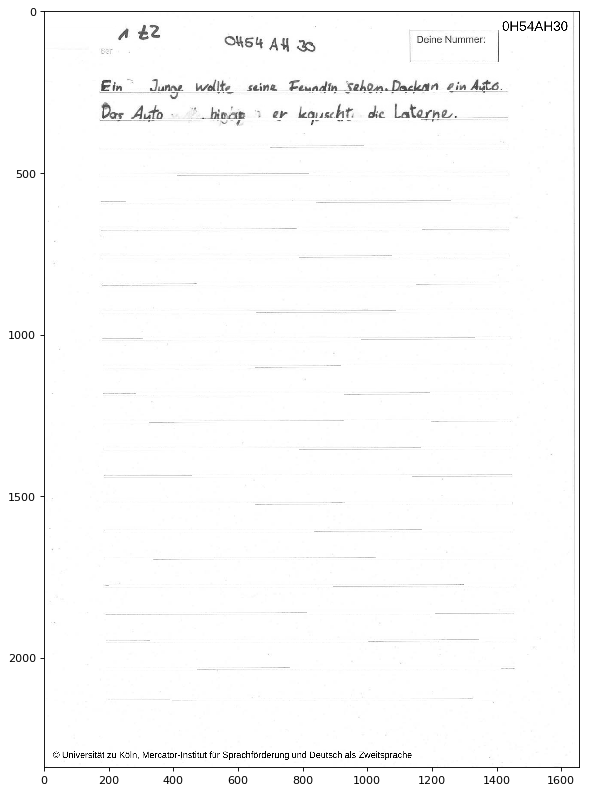

In [53]:
display_image(im, 'gray')